# <span style="color:#88228F"> In-vivo QSM image creation </span> </br>

In [133]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import pandas as pd

In [153]:
# Import from monkey_tools
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)

import monkey_tools.extract_metric
importlib.reload(monkey_tools.extract_metric)

from monkey_tools.extract_metric import extract_values_per_vertebrae  # re-import updated function

c:\Users\Admin\Documents\msc_project\Image-processing-strategies


In [327]:
import monkey_tools.snr_calc
importlib.reload(monkey_tools.snr_calc)
from monkey_tools.snr_calc import snr_calc  # re-import updated function

In [331]:
import monkey_tools.dipole_kernel
importlib.reload(monkey_tools.dipole_kernel)
from monkey_tools.dipole_kernel import dipole_kernel  # re-import updated function

In [ ]:
# Load the respective gray and white matter masks
z1_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\custom_hc1_m2_gm_msk.nii.gz").get_fdata()
z1_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\custom_hc1_m2_wm_msk.nii.gz").get_fdata()

z2_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom_hc2_m1_gm_msk.nii.gz").get_fdata()
z2_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom_hc2_m1_wm_msk.nii.gz").get_fdata()

m_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_gm_msk.nii.gz").get_fdata()
m_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_wm_msk.nii.gz").get_fdata()


In [ ]:
# Load the vertebrae labeled SC masks
z1_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\hc1_m2_sc_msk_labeled.nii.gz").get_fdata()
z2_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom1_sc_vert_msk.nii.gz").get_fdata()
m_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_vertfiles\chi_003_m2_sc_msk_labeled.nii.gz").get_fdata()

## <span style="color:#64DAE8"> BGFR across participants </span> </br>
best performing BGFR boxplot of per-vertebrae WM and GM local field values across subjects (vertebrae values on x-axis, for each vertebrae two boxes, one for WM and one for GM)

In [3]:
zurich_1_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\local_field\opt_pdf\Sepia_localfield.nii.gz")
zurich_2_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\local_field\final_pdf_opt\Sepia_localfield.nii.gz")
montreal_best_lf_img =nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\local_field\pdf_dev\test2_opt\Sepia_localfield.nii.gz")

In [4]:
z1_lf_data = zurich_1_best_lf_img.get_fdata()
z2_lf_data = zurich_2_best_lf_img.get_fdata()   
m_lf_data = montreal_best_lf_img.get_fdata()

In [199]:
lf_data = []

# Zurich 1
print("Processing Zurich 1 - gm")
lf_data += extract_values_per_vertebrae(z1_lf_data, z1_gm_msk_data, z1_vertfile_data, "Zurich1", "GM", "mean")
print("Processing Zurich 1 - wm")
lf_data += extract_values_per_vertebrae(z1_lf_data, z1_wm_msk_data, z1_vertfile_data, "Zurich1", "WM", "mean")

# Zurich 2
print("Processing Zurich 2 - gm")
lf_data += extract_values_per_vertebrae(z2_lf_data, z2_gm_msk_data, z2_vertfile_data, "Zurich2", "GM", "mean")
print("Processing Zurich 2 - wm")
lf_data += extract_values_per_vertebrae(z2_lf_data, z2_wm_msk_data, z2_vertfile_data, "Zurich2", "WM", "mean")

# Montreal
print("Processing Montreal - gm")
lf_data += extract_values_per_vertebrae(m_lf_data, m_gm_msk_data, m_vertfile_data, "Montreal", "GM", "mean")
print("Processing Montreal - wm")
lf_data += extract_values_per_vertebrae(m_lf_data, m_wm_msk_data, m_vertfile_data, "Montreal", "WM", "mean")
best_lf_df = pd.DataFrame(lf_data)

Processing Zurich 1 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.342023583483993
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.31831058846267907
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.5016622866038233
Total records extracted for GM: 3
Processing Zurich 1 - wm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue WM: -0.05300352302952603
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue WM: -0.0842138087247777
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue WM: -0.11304792801324563
Total records extracted for WM: 3
Processing Zurich 2 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.4401497665482263
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.42409390607947267
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.447050301662009
Total records extracted for GM: 3

In [200]:
# Because only one subject has vertebrae 4 and 5 labeled, we will exclude these levels from the plot
best_lf_df = best_lf_df[best_lf_df['Vertebrae'].isin([1, 2, 3])]


In [201]:
print(best_lf_df.shape)
print(best_lf_df.head())


(18, 5)
  Participant_ID  Vertebrae Tissue     Value  Nvoxels
0        Zurich1          1     GM  0.342024      143
1        Zurich1          2     GM  0.318311      158
2        Zurich1          3     GM  0.501662      140
3        Zurich1          1     WM -0.053004      844
4        Zurich1          2     WM -0.084214      812


In [202]:
# Update the vertebrae numbers to strings for better plotting
best_lf_df['Vertebrae'] = best_lf_df['Vertebrae'].astype(str)
# Then change name instead of 1 to C2, 2 to C3, 3 to C4
best_lf_df['Vertebrae'] = best_lf_df['Vertebrae'].replace({'1': 'C1', '2': 'C2', '3': 'C3'})

In [203]:
best_lf_df_wm = best_lf_df[best_lf_df["Tissue"] == "WM"]
best_lf_df_gm = best_lf_df[best_lf_df["Tissue"] == "GM"]

In [204]:
best_lf_df_gm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
0,Zurich1,C1,GM,0.342024,143
1,Zurich1,C2,GM,0.318311,158
2,Zurich1,C3,GM,0.501662,140
6,Zurich2,C1,GM,0.440150,156
7,Zurich2,C2,GM,0.424094,130


In [205]:
best_lf_df_wm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
3,Zurich1,C1,WM,-0.053004,844
4,Zurich1,C2,WM,-0.084214,812
5,Zurich1,C3,WM,-0.113048,628
9,Zurich2,C1,WM,-0.085377,799
10,Zurich2,C2,WM,-0.098380,592


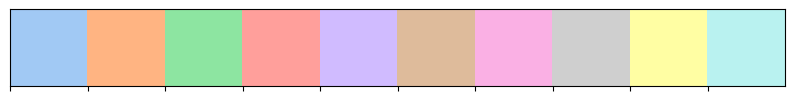

In [235]:
palette = sns.color_palette("pastel")
sns.palplot(palette)

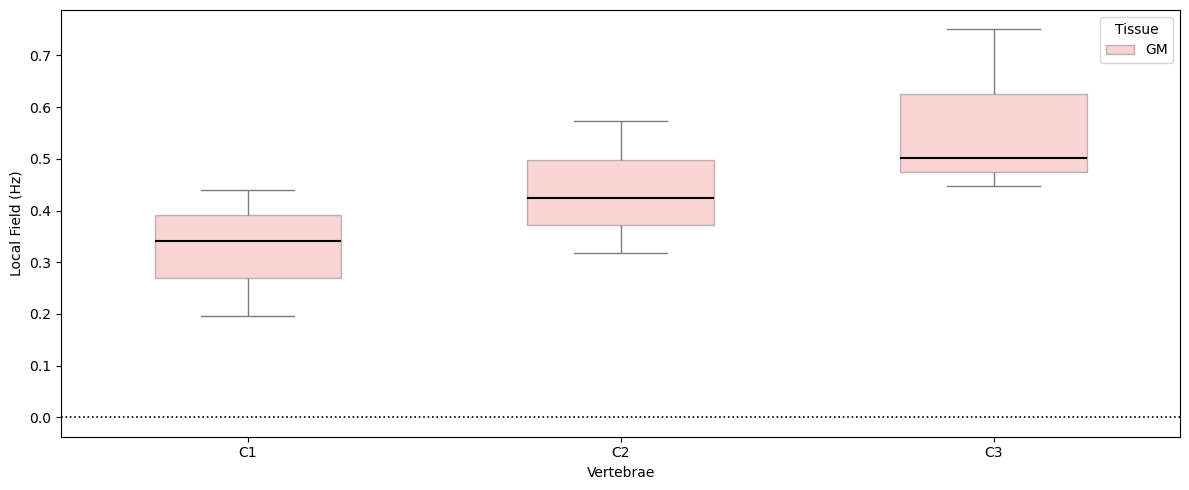

In [243]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_lf_df_gm,
    x="Vertebrae",
    y="Value",
    color=palette[3],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['GM'], title="Tissue")
plt.ylabel("Local Field (Hz)")

plt.tight_layout()
plt.show()


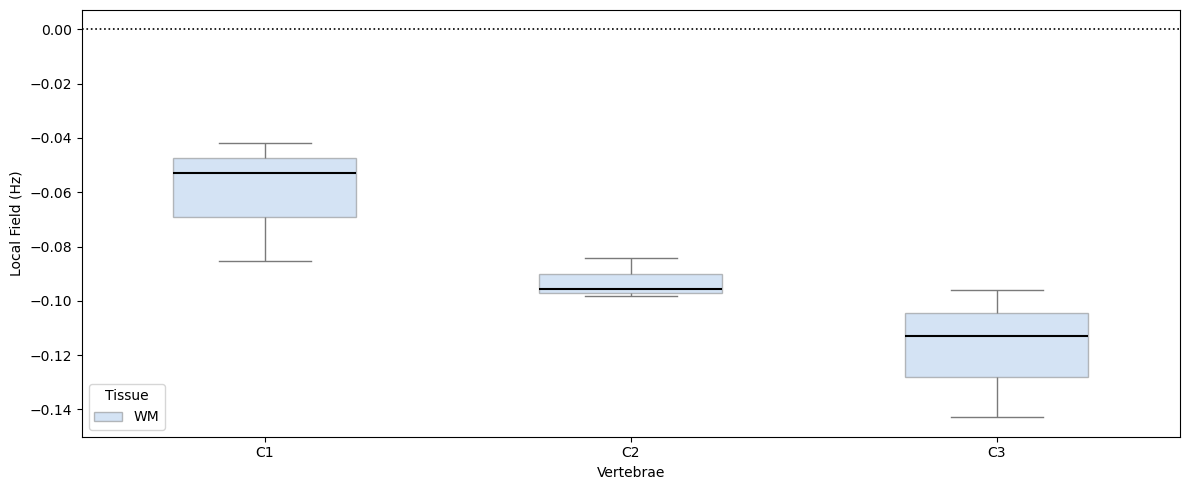

In [242]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_lf_df_wm,
    x="Vertebrae",
    y="Value",
    color=palette[0],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['WM'], title="Tissue")
plt.ylabel("Local Field (Hz)")

plt.tight_layout()
plt.show()


## <span style="color:#C46FD9"> DI across participants </span> </br>
best performing DI boxplot of per-vertebrae WM and GM susceptibility map values across subjects (vertebrae values on x-axis, for each vertebrae two boxes, one for WM and one for GM)

In [246]:
zurich_1_best_xmap_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\chi_map\pdf_to_closedForm\opt_to_opt\Sepia_Chimap.nii.gz")
zurich_2_best_xmap_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\chi_map\opt_pdf_to_all_DI\opt_closedForm\Sepia_Chimap.nii.gz")
montreal_best_xmap_img =nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_map\closed_form_dev\test2_noisyOpt_t1\Sepia_Chimap.nii.gz")

In [247]:
z1_xmap_data = zurich_1_best_xmap_img.get_fdata()
z2_xmap_data = zurich_2_best_xmap_img.get_fdata()   
m_xmap_data = montreal_best_xmap_img.get_fdata()

In [248]:
xmap_data = []

# Zurich 1
print("Processing Zurich 1 - gm")
xmap_data += extract_values_per_vertebrae(z1_xmap_data, z1_gm_msk_data, z1_vertfile_data, "Zurich1", "GM", "mean")
print("Processing Zurich 1 - wm")
xmap_data += extract_values_per_vertebrae(z1_xmap_data, z1_wm_msk_data, z1_vertfile_data, "Zurich1", "WM", "mean")

# Zurich 2
print("Processing Zurich 2 - gm")
xmap_data += extract_values_per_vertebrae(z2_xmap_data, z2_gm_msk_data, z2_vertfile_data, "Zurich2", "GM", "mean")
print("Processing Zurich 2 - wm")
xmap_data += extract_values_per_vertebrae(z2_xmap_data, z2_wm_msk_data, z2_vertfile_data, "Zurich2", "WM", "mean")

# Montreal
print("Processing Montreal - gm")
xmap_data += extract_values_per_vertebrae(m_xmap_data, m_gm_msk_data, m_vertfile_data, "Montreal", "GM", "mean")
print("Processing Montreal - wm")
xmap_data += extract_values_per_vertebrae(m_xmap_data, m_wm_msk_data, m_vertfile_data, "Montreal", "WM", "mean")
best_xmap_df = pd.DataFrame(xmap_data)

Processing Zurich 1 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.008230733631484377
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.006960272924044159
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.012877721096447203
Total records extracted for GM: 3
Processing Zurich 1 - wm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue WM: -0.0015593100948746931
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue WM: -0.001975260313567085
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue WM: -0.0026170190994209037
Total records extracted for WM: 3
Processing Zurich 2 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.00605657293561261
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.006076906551159202
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.00654198125488811
Total records ext

In [249]:
# Because only one subject has vertebrae 4 and 5 labeled, we will exclude these levels from the plot
best_xmap_df = best_xmap_df[best_xmap_df['Vertebrae'].isin([1, 2, 3])]

In [250]:
# Update the vertebrae numbers to strings for better plotting
best_xmap_df['Vertebrae'] = best_xmap_df['Vertebrae'].astype(str)
# Then change name instead of 1 to C2, 2 to C3, 3 to C4
best_xmap_df['Vertebrae'] = best_xmap_df['Vertebrae'].replace({'1': 'C1', '2': 'C2', '3': 'C3'})

In [251]:
best_xmap_df_wm = best_xmap_df[best_xmap_df["Tissue"] == "WM"]
best_xmap_df_gm = best_xmap_df[best_xmap_df["Tissue"] == "GM"]

In [252]:
best_xmap_df_wm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
3,Zurich1,C1,WM,-0.001559,844
4,Zurich1,C2,WM,-0.001975,812
5,Zurich1,C3,WM,-0.002617,628
9,Zurich2,C1,WM,-0.000951,799
10,Zurich2,C2,WM,-0.001201,592


In [253]:
best_xmap_df_gm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
0,Zurich1,C1,GM,0.008231,143
1,Zurich1,C2,GM,0.006960,158
2,Zurich1,C3,GM,0.012878,140
6,Zurich2,C1,GM,0.006057,156
7,Zurich2,C2,GM,0.006077,130


### Box plots </br>
Not really usefull for the calculation done, but useful code for later maybe

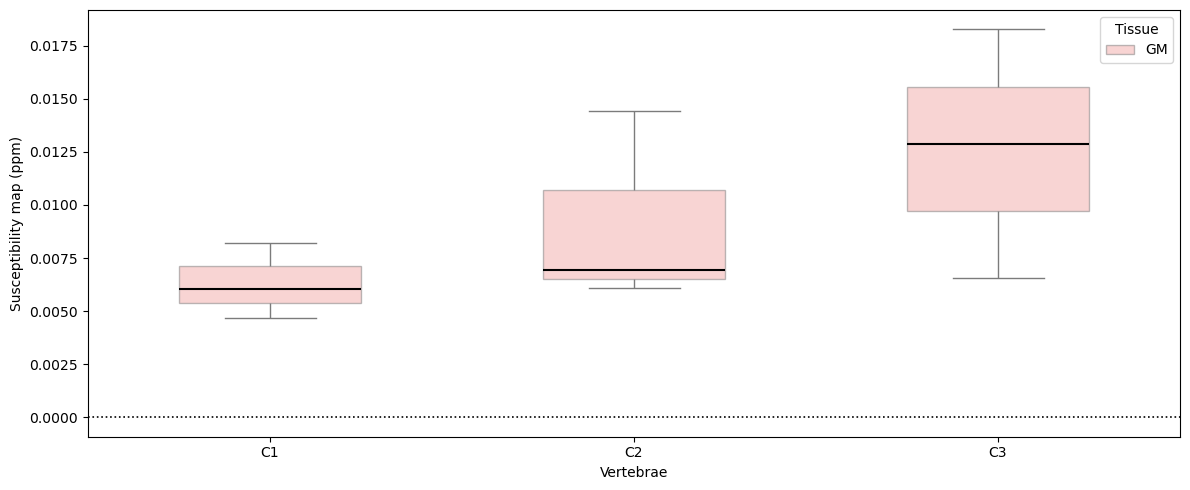

In [254]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_xmap_df_gm,
    x="Vertebrae",
    y="Value",
    color=palette[3],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['GM'], title="Tissue")
plt.ylabel("Susceptibility map (ppm)")

plt.tight_layout()
plt.show()


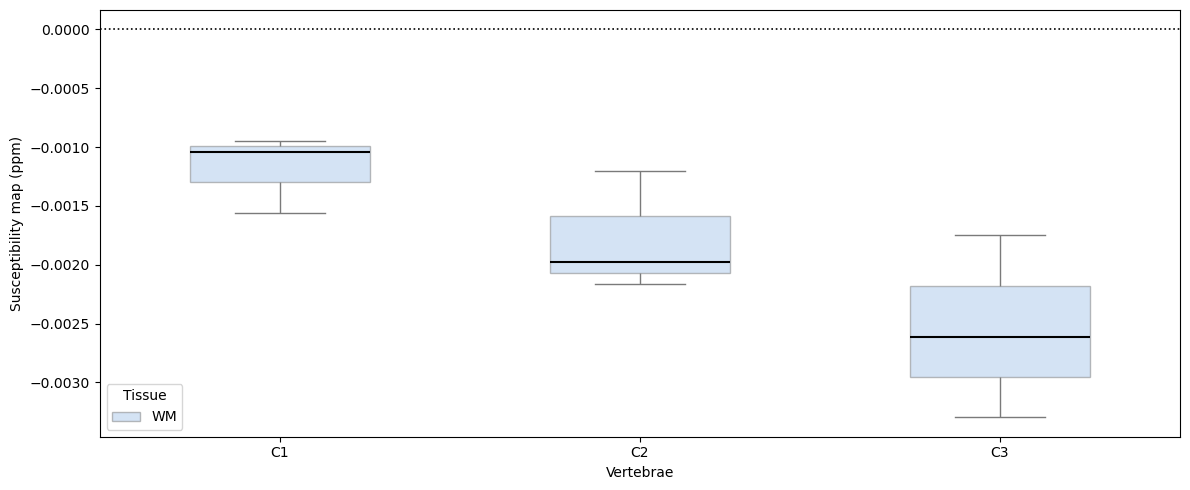

In [255]:
plt.figure(figsize=(12, 5))

# Boxplot (IQR)
sns.boxplot(
    data=best_xmap_df_wm,
    x="Vertebrae",
    y="Value",
    color=palette[0],
    dodge=False,
    width=0.5,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2)

plt.legend(labels=['WM'], title="Tissue")
plt.ylabel("Susceptibility map (ppm)")

plt.tight_layout()
plt.show()


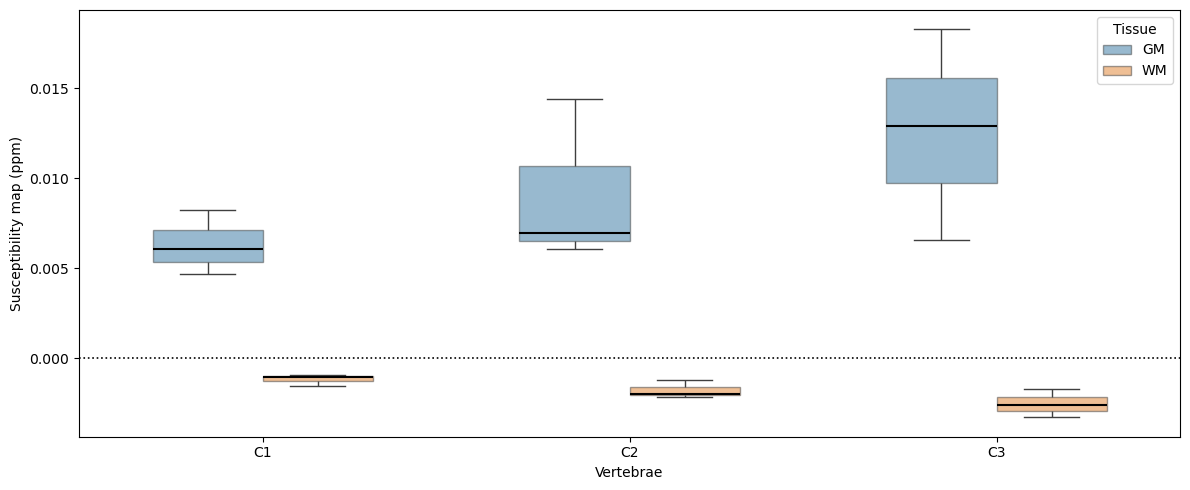

In [256]:
# Now both together:
plt.figure(figsize=(12, 5))
# Boxplot (IQR)
sns.boxplot(
    data=best_xmap_df,
    x="Vertebrae",
    y="Value",
    hue="Tissue",
    dodge=True,
    width=0.6,
    showcaps=True,
    showfliers=False,
    boxprops=dict(alpha=0.5),
    medianprops=dict(color="k", linewidth=1.5),
)
# Axis styling
plt.axhline(0, linestyle=":", color="k", linewidth=1.2
)
plt.legend(title="Tissue")
plt.ylabel("Susceptibility map (ppm)")
plt.tight_layout()
plt.show()

### Dot plot :3 </br>
Better to show the average across participants and how much they deviate from the group-mean


In [291]:
#subj_means = (
#    best_lf_df
#    .groupby(["Participant_ID", "Vertebrae", "Tissue"])
#    .apply(lambda x: np.average(x["Value"], weights=x["Nvoxels"]))
#    .reset_index(name="Value")
#)

subj_means_lf = (
    best_lf_df
    .groupby(["Participant_ID", "Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(subj_means_lf)

   Participant_ID Vertebrae Tissue     Value
0        Montreal        C1     GM  0.195805
1        Montreal        C1     WM -0.041743
2        Montreal        C2     GM  0.572740
3        Montreal        C2     WM -0.095690
4        Montreal        C3     GM  0.750381
5        Montreal        C3     WM -0.142943
6         Zurich1        C1     GM  0.342024
7         Zurich1        C1     WM -0.053004
8         Zurich1        C2     GM  0.318311
9         Zurich1        C2     WM -0.084214
10        Zurich1        C3     GM  0.501662
11        Zurich1        C3     WM -0.113048
12        Zurich2        C1     GM  0.440150
13        Zurich2        C1     WM -0.085377
14        Zurich2        C2     GM  0.424094
15        Zurich2        C2     WM -0.098380
16        Zurich2        C3     GM  0.447050
17        Zurich2        C3     WM -0.096172


In [292]:
subj_means_xmap = (
    best_xmap_df
    .groupby(["Participant_ID", "Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(subj_means_xmap)

   Participant_ID Vertebrae Tissue     Value
0        Montreal        C1     GM  0.004667
1        Montreal        C1     WM -0.001040
2        Montreal        C2     GM  0.014411
3        Montreal        C2     WM -0.002162
4        Montreal        C3     GM  0.018269
5        Montreal        C3     WM -0.003298
6         Zurich1        C1     GM  0.008231
7         Zurich1        C1     WM -0.001559
8         Zurich1        C2     GM  0.006960
9         Zurich1        C2     WM -0.001975
10        Zurich1        C3     GM  0.012878
11        Zurich1        C3     WM -0.002617
12        Zurich2        C1     GM  0.006057
13        Zurich2        C1     WM -0.000951
14        Zurich2        C2     GM  0.006077
15        Zurich2        C2     WM -0.001201
16        Zurich2        C3     GM  0.006542
17        Zurich2        C3     WM -0.001750


In [293]:
group_means_lf = (
    subj_means_lf
    .groupby(["Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(group_means_lf)

  Vertebrae Tissue     Value
0        C1     GM  0.325993
1        C1     WM -0.060041
2        C2     GM  0.438382
3        C2     WM -0.092761
4        C3     GM  0.566364
5        C3     WM -0.117387


In [295]:
group_means_xmap = (
    subj_means_xmap
    .groupby(["Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(group_means_xmap)

  Vertebrae Tissue     Value
0        C1     GM  0.006318
1        C1     WM -0.001183
2        C2     GM  0.009149
3        C2     WM -0.001780
4        C3     GM  0.012563
5        C3     WM -0.002555


In [306]:
tissue_colors = {
    "GM": "#e01212",  # teal
    "WM": "#5c3af3",  # orange
    "CSF": "#46dd28",  # purple
}

In [307]:
participant_markers = {
    "Zurich1": "o",
    "Zurich2": "s",
    "Montreal": "D",
}

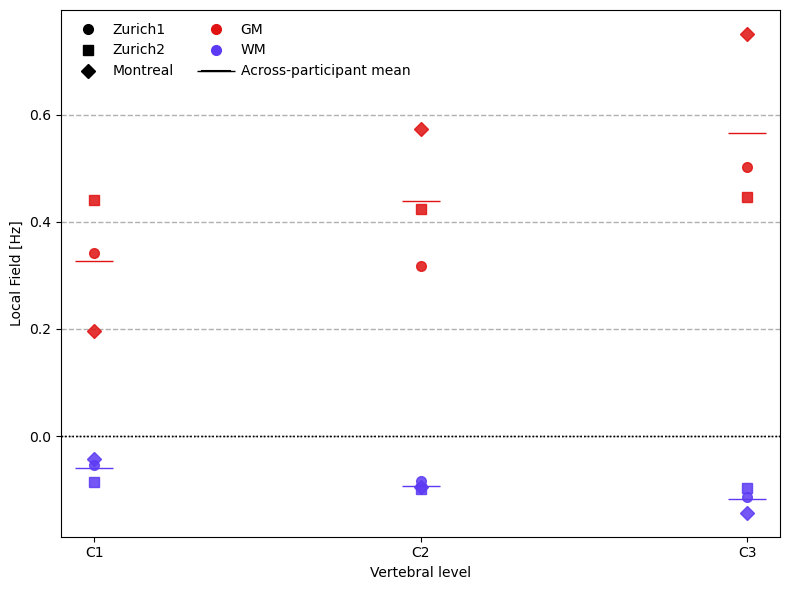

In [317]:
# LOCAL FIELD PLOT
plt.figure(figsize=(8, 6
                    ))

vertebrae = sorted(best_lf_df["Vertebrae"].unique())
x = np.arange(len(vertebrae))

tissues = ["GM", "WM"]
offsets = {"GM": 0, "WM": 0}

# --- participant-level dots ---
for tissue in tissues:
    for pid in participant_markers.keys():
        df_tmp = subj_means_lf[
            (subj_means_lf["Participant_ID"] == pid) &
            (subj_means_lf["Tissue"] == tissue)
        ].set_index("Vertebrae").reindex(vertebrae)

        plt.plot(
            x,
            df_tmp["Value"],
            linestyle="None",
            marker=participant_markers[pid],
            markersize=7,
            color=tissue_colors[tissue],
            alpha=0.85
        )

# --- group mean dashes ---
for tissue in tissues:
    df_tmp = group_means_lf[group_means_lf["Tissue"] == tissue].set_index("Vertebrae")

    plt.plot(
        x,
        df_tmp.loc[vertebrae]["Value"],
        linestyle="None",
        marker="_",
        markersize=28,
        color=tissue_colors[tissue],
        linewidth=4,
        label=f"{tissue} mean"
    )


from matplotlib.lines import Line2D

participant_legend = [
    Line2D([0], [0], marker=participant_markers[pid], color="k",
           linestyle="None", markersize=7, label=pid)
    for pid in participant_markers
]

tissue_legend = [
    Line2D([0], [0], marker="o", color=tissue_colors["GM"],
           linestyle="None", markersize=7, label="GM"),
    Line2D([0], [0], marker="o", color=tissue_colors["WM"],
           linestyle="None", markersize=7, label="WM"),
    Line2D([0], [0], marker="_", color="k",
           markersize=28, label="Across-participant mean"),
]

plt.legend(
    handles=participant_legend + tissue_legend,
    frameon=False,
    ncol=2
)

plt.xticks(x, vertebrae)
plt.axhline(0, linestyle=":", color="k", linewidth=1)
plt.ylabel("Local Field (Hz)")
plt.xlabel("Vertebral level")

plt.grid(
    axis="y",
    linestyle="--",
    linewidth=1,
    alpha=1
)


plt.xticks(x, vertebrae)
plt.axhline(0, linestyle=":", color="k", linewidth=1)
plt.ylabel("Local Field [Hz]")
plt.xlabel("Vertebral level")

plt.tight_layout()
plt.show()



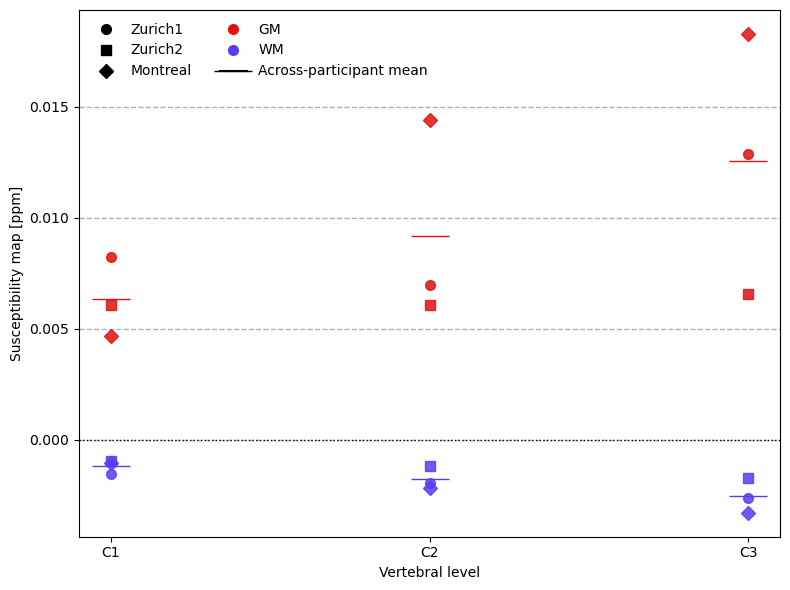

In [318]:
# SUSCEPTIBILITY MAP PLOT
plt.figure(figsize=(8, 6
                    ))

vertebrae = sorted(best_xmap_df["Vertebrae"].unique())
x = np.arange(len(vertebrae))

tissues = ["GM", "WM"]
offsets = {"GM": 0, "WM": 0}

# --- participant-level dots ---
for tissue in tissues:
    for pid in participant_markers.keys():
        df_tmp = subj_means_xmap[
            (subj_means_xmap["Participant_ID"] == pid) &
            (subj_means_xmap["Tissue"] == tissue)
        ].set_index("Vertebrae").reindex(vertebrae)

        plt.plot(
            x,
            df_tmp["Value"],
            linestyle="None",
            marker=participant_markers[pid],
            markersize=7,
            color=tissue_colors[tissue],
            alpha=0.85
        )

# --- group mean dashes ---
for tissue in tissues:
    df_tmp = group_means_xmap[group_means_xmap["Tissue"] == tissue].set_index("Vertebrae")

    plt.plot(
        x,
        df_tmp.loc[vertebrae]["Value"],
        linestyle="None",
        marker="_",
        markersize=28,
        color=tissue_colors[tissue],
        linewidth=4,
        label=f"{tissue} mean"
    )


from matplotlib.lines import Line2D

participant_legend = [
    Line2D([0], [0], marker=participant_markers[pid], color="k",
           linestyle="None", markersize=7, label=pid)
    for pid in participant_markers
]

tissue_legend = [
    Line2D([0], [0], marker="o", color=tissue_colors["GM"],
           linestyle="None", markersize=7, label="GM"),
    Line2D([0], [0], marker="o", color=tissue_colors["WM"],
           linestyle="None", markersize=7, label="WM"),
    Line2D([0], [0], marker="_", color="k",
           markersize=28, label="Across-participant mean"),
]

plt.legend(
    handles=participant_legend + tissue_legend,
    frameon=False,
    ncol=2
)


plt.grid(
    axis="y",
    linestyle="--",
    linewidth=1,
    alpha=1
)

plt.xticks(x, vertebrae)
plt.axhline(0, linestyle=":", color="k", linewidth=1)
plt.ylabel("Susceptibility map [ppm]")
plt.xlabel("Vertebral level")

plt.tight_layout()
plt.show()


## <span style="color:#1FCBED"> Comparing k-space data? </span> </br>
This is an idea I have to show something regarding DI algorithms in-vivo for SC and comparing to brain in-vivo QSM :) </br>
Theory: </br>
Remember that the forward model for QSM is: $\Delta B(k) = D(k) \cdot \chi (k)$ </br>
Therefore let's analyze the local fields!

In [ ]:
# We already load in our best local field above so let's just reuse that data
# The one we use is: m_lf_data and montreal_best_lf_img for image affine and header
# First calculate snr with brain data
brain_mag_img =r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\Magnitude_data.nii.gz"
brain_noise_msk_data = r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\noise_msk.nii.gz"
brain_signal_msk_data = r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\fm_tests\SEPIAs_ROMEO\Sepia_mask_brain.nii.gz"

In [329]:
snr, sigma = snr_calc(brain_mag_img, brain_signal_msk_data, brain_noise_msk_data)
# For this data, echo times are: 3, 7, 11, 15, 19, 23 ms
print(f"Brain SNR: {snr}, Sigma: {sigma}")

Brain SNR: [76.32438082 70.50967702 65.33677922 60.70862643 56.41281923 52.46814731], Sigma: 5.743902151228784


In [399]:
brain_mag_img = nib.load(brain_mag_img)

In [ ]:
# Let's see the kspace data and the dipole kernel for the brain data set
# Load the local field data
brain_local_field_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\local_field\def_pdf\Sepia_localfield.nii.gz").get_fdata()
# Create dipole kernel continuous
brain_DK = dipole_kernel(brain_local_field_data.shape, voxel_size=(0.6944, 0.6944, 0.7), b0_dir=(0, 0, 1), mode="continuous")
# Now calculate the k-space of the local field
brain_lf_kspace = np.fft.fftshift(np.fft.fftn(brain_local_field_data))

brain_lf_k_mag = np.log10(np.abs(brain_lf_kspace) + 1e-6)

In [ ]:
voxel_size = montreal_best_lf_img.header.get_zooms()[:3]

print("SC shape:", m_lf_data.shape)
print("Voxel size:", voxel_size)
print("FOV (mm):", np.array(m_lf_data.shape) * np.array(voxel_size))

SC shape: (384, 384, 16)
Voxel size: (np.float32(0.442708), np.float32(0.442708), np.float32(5.0))
FOV (mm): [169.99986649 169.99986649  80.        ]


In [407]:
# Now something similar but with the SC data
sc_DK = dipole_kernel(m_lf_data.shape, voxel_size=voxel_size, b0_dir=(0, 0, 1), mode="continuous")
# Now calculate the k-space of the local field
sc_lf_kspace = np.fft.fftshift(np.fft.fftn(m_lf_data))
sc_lf_k_mag = np.log10(np.abs(sc_lf_kspace) + 1e-6)


In [394]:
# Create image for local field in k-space 
kspace_img = nib.Nifti1Image(sc_lf_kspace, affine=montreal_best_lf_img.affine)
nib.save(kspace_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\best_LF_kspace.nii.gz")

In [396]:
# Save dipole kernel null cone lines but as binary mask
null_cone_mask = np.isclose(sc_DK, 0, atol=1e-2).astype(np.float32)
null_cone_img = nib.Nifti1Image(null_cone_mask, affine=montreal_best_lf_img.affine)
nib.save(null_cone_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\dipole_kernel_null_cone_mask.nii.gz")

In [401]:
# Save brain k-space image
brain_kspace_img = nib.Nifti1Image(brain_lf_kspace, affine=brain_mag_img.affine)
nib.save(brain_kspace_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\brain_LF_kspace.nii.gz")
# Save brain dipole kernel null cone mask
brain_null_cone_mask = np.isclose(brain_DK, 0, atol=1e-2).astype(np.float32)
brain_null_cone_img = nib.Nifti1Image(brain_null_cone_mask, affine=brain_mag_img.affine)
nib.save(brain_null_cone_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\brain_dipole_kernel_null_cone_mask.nii.gz")

In [ ]:
epsilon = 1e-3

msk_magic = np.abs(sc_DK) < epsilon
print("Number of voxels in magic angle mask:", np.sum(msk_magic))

Number of voxels in magic angle mask: 241


In [403]:
# Now for brain
msk_magic_brain = np.abs(brain_DK) < epsilon
print("Number of voxels in brain magic angle mask:", np.sum(msk_magic_brain))

Number of voxels in brain magic angle mask: 32333


In [404]:
# Now calculate the percentage of k-space affected by the magic angle for both brain and SC
perc_magic_sc = (np.sum(msk_magic) / sc_DK.size) * 100
perc_magic_brain = (np.sum(msk_magic_brain) / brain_DK.size) * 100
print(f"Percentage of k-space affected by magic angle (SC): {perc_magic_sc:.4f}%")
print(f"Percentage of k-space affected by magic angle (Brain): {perc_magic_brain:.4f}%")

Percentage of k-space affected by magic angle (SC): 0.0102%
Percentage of k-space affected by magic angle (Brain): 0.2436%


In [405]:
# Now let's do something similar with the phantom data with dims: 301, 351 128
phantom_lf_img = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\November_2025\mrsim_outputs\custom_params_snr_74\bgfr_opt\iter_PDF\tol_and_padSize\RMSE_test1\pdf_run76\Sepia_localfield.nii.gz")
phantom_lf_data = phantom_lf_img.get_fdata()
phantom_DK = dipole_kernel(phantom_lf_data.shape, voxel_size=(0.9766, 0.9766, 2.344), b0_dir=(0, 0, 1), mode="continuous")
phantom_lf_kspace = np.fft.fftshift(np.fft.fftn(phantom_lf_data))
phantom_lf_k_mag = np.log10(np.abs(phantom_lf_kspace) + 1e-6)
# Create the images
phantom_kspace_img = nib.Nifti1Image(phantom_lf_kspace, affine=phantom_lf_img.affine)
nib.save(phantom_kspace_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests/phantom_LF_kspace.nii.gz")
# Save phantom dipole kernel null cone mask
phantom_null_cone_mask = np.isclose(phantom_DK, 0, atol=1e-2).astype(np.float32)
phantom_null_cone_img = nib.Nifti1Image(phantom_null_cone_mask, affine=phantom_lf_img.affine)
nib.save(phantom_null_cone_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests/phantom_dipole_kernel_null_cone_mask.nii.gz")
# Calculate magic angle mask for phantom
msk_magic_phantom = np.abs(phantom_DK) < epsilon
print("Number of voxels in phantom magic angle mask:", np.sum(msk_magic_phantom))
# Now calculate the percentage of k-space affected by the magic angle for phantom
perc_magic_phantom = (np.sum(msk_magic_phantom) / phantom_DK.size) * 100
print(f"Percentage of k-space affected by magic angle (Phantom): {perc_magic_phantom:.4f}%")

Number of voxels in phantom magic angle mask: 10981
Percentage of k-space affected by magic angle (Phantom): 0.0812%


## <span style="color:#80F296"> Useful informations for Discussions section </span> </br>
Using in-vivo data

In [319]:
# Regarding dipole inversion, maybe we can do some stuff to further analyze the results from algos
# First idea, subtract from tkd x-map with iLSQR x-map
tkd_xmap_best = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_map\tkd_dev\test3_noisy_opt_t1\Sepia_Chimap.nii.gz")
iLSQR_xmap_best = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_map\iLSQR_dev\test3_noisyOpt_t1\Sepia_Chimap.nii.gz")

In [320]:
tkd_xmap_best_data = tkd_xmap_best.get_fdata()
iLSQR_xmap_best_data = iLSQR_xmap_best.get_fdata()

diff_tkd_iLSQR = tkd_xmap_best_data - iLSQR_xmap_best_data

# Now we can visualize this difference map
diff_img = nib.Nifti1Image(diff_tkd_iLSQR, affine=tkd_xmap_best.affine)
nib.save(diff_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\diff_tkd_iLSQR.nii.gz")